In [ ]:
#Approximate the ramp function f(x) = x+|x|/2
#with a Taylor series around x = 2. Compare
#your approximation over the domain (0,6). Compare when you use up to 1, 2, 5 and 20 order
#approximations. Discuss your results.

## Define functions and import libraries

In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = (x+abs(x))/2

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

#Numerical differentiation
def NumDiff(function, i):
    h=10**(-1)
    if i == 0:
        return function
    else:
        return NumDiff(((function.subs(x,x+h)-function.subs(x,x-h))/(2*h)), i-1)
    
    
# Taylor approximation at x0 of the function 'function'
def taylorNum(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (NumDiff(function, i).subs(x, x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

## Plot results of the exact function and approximations

Taylor expansion at n=1 1.0*x
Taylor expansion at n=2 1.0*x
Taylor expansion at n=5 1.0*x
Taylor expansion at n=20 1.0*x + 3.6828445904877e-15*(x - 2)**20 - 8.41793049254331e-15*(x - 2)**19 - 7.49721934492139e-15*(x - 2)**18 - 1.40572862717276e-14*(x - 2)**17 - 1.59277015593476e-14*(x - 2)**12 - 4.61965562805297e-14*(x - 2)**8


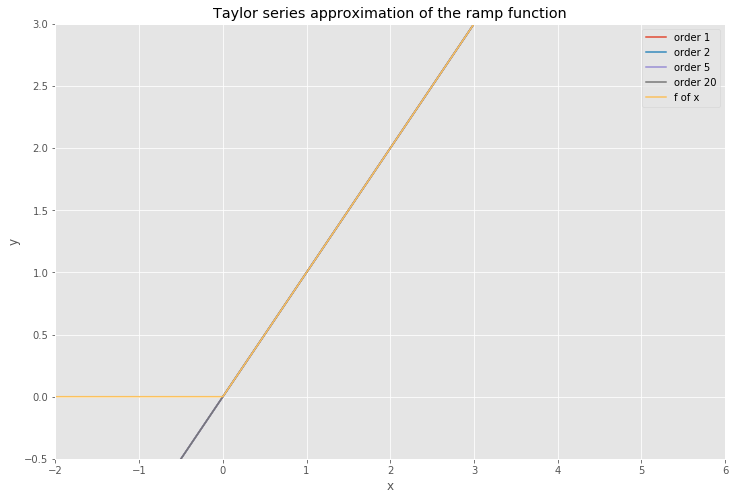

In [3]:
def plot():
    x_lims = [-2,6]
    x1 = np.linspace(-2,6,800)
    y1 = []
    # Approximate
    for j in [1,2,5,20]:
        func = taylorNum(f,2,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate
    plt.plot(x1,(x1+abs(x1))/2,label='f of x')
    plt.xlim(x_lims)
    plt.ylim([-0.5,3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation of the ramp function')
    plt.rcParams["figure.figsize"] = (12,8)
    plt.show()

plot()

## Plot error function

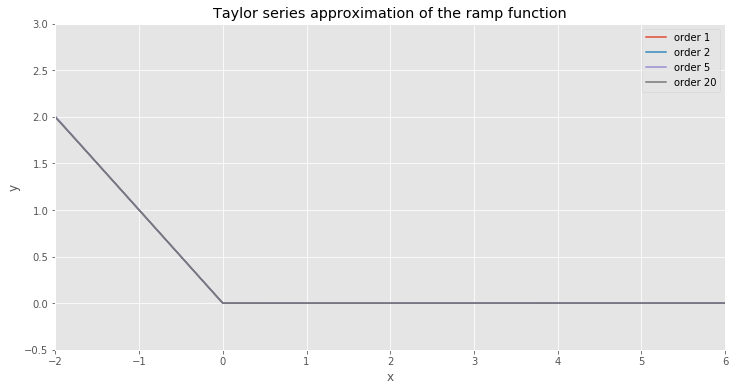

In [5]:
def plot():
    x_lims = [-2,6]
    x1 = np.linspace(-2,6,800)
    y1 = []
    # Approximate
    for j in [1,2,5,20]:
        func = taylorNum(f,2,j)
        #print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(abs((k+abs(k))/2-func.subs(x,k)))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []

    plt.xlim(x_lims)
    plt.ylim([-0.5,3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation of the ramp function')
    plt.rcParams["figure.figsize"] = (12,6)
    plt.show()

plot()